# HomeWork Advance

### Assignment 1

Create a black hole mass guessing python code, in which the user selects a mass range in integers (RangeMax and RangeMin as input).

User can selected a range, i.e., from 5 to 120 solar mass.
Some random BH mass (integer) will be choosen by the system and the user has to guess that BH mass within a certain number of guesses. Take the guess value as input.

Set a maximum number of guesses. The maximum number of gess would be $log2(RangeMax – RangeMin + 1)$. 

In [2]:
import random
import math
# Taking Inputs
lower = int(input("Enter Lower bound of black hole mass (Msun):- "))
 
# Taking Inputs
upper = int(input("Enter Upper bound of black hole mass (Msun):- "))
 
# Get the random mass between
x = random.randint(lower, upper)
print("\n\tYou've only ",
       round(math.log(upper - lower + 1, 2)),
      " chances to guess the black hole mass!\n")
 
# Initializing guess number.
count = 0
 
# Minimum number of guesses depends upon mass range
while count < math.log(upper - lower + 1, 2):
    count += 1
 
    # taking guessing number as input
    guess = int(input("Guess a number:- "))
 
    # Condition testing
    if x == guess:
        print("Congratulations your guess is correct and you did it in ",
              count, " try")
        print("Black hole mass is ", x, " Msun")
        # Once guessed, loop will break
        break
    elif x > guess:
        print("You guessed too small!")
    elif x < guess:
        print("You Guessed too high!")
 
# shows this output.
if count >= math.log(upper - lower + 1, 2):
    print("\nThe number is %d" % x)
    print("\tBetter Luck Next time!")
 

Enter Lower bound of black hole mass (Msun):- 45
Enter Upper bound of black hole mass (Msun):- 67

	You've only  5  chances to guess the black hole mass!

Guess a number:- 45
You guessed too small!
Guess a number:- 49
You guessed too small!
Guess a number:- 55
You guessed too small!
Guess a number:- 60
You guessed too small!
Guess a number:- 65
You Guessed too high!

The number is 61
	Better Luck Next time!


### Assignment 2

Calculate the absolute magnitude of the galaxies. Users are given a galaxy catalog data file named gwgc200.txt. 

One way to read the file is 

from astropy.io import ascii
data = np.loadtxt("file name")

The data cotains the apparent magnitude and distance of the galaxies with errors. 
Users have to calculate the absolute magnitude and the error for all galaxies.
Plot absolute magnitude vs apparent magnitude with errorbars.
To plot errorbars one can use 

plt.errorbar(x, y, x_error, y_error)

No handles with labels found to put in legend.


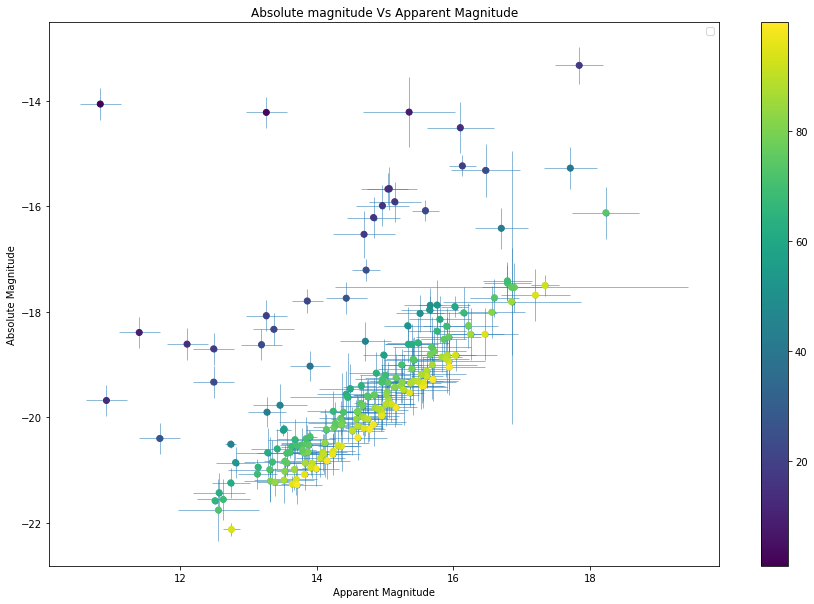

In [4]:
# Defining function with default arguments
# Indentation is must

# imports
import numpy as np
from astropy.io import ascii

# read galaxy catalog data
data = ascii.read("../gwgc200.txt")

def Abs_Mag(apr_mag, galaxy_dist, e_aprmag=0., e_galaxy_dist=0.):
    '''Calculate the absolute mag from its apparent mag and distance'''
    
    galaxy_dist = galaxy_dist * 10**6
    absmag = apr_mag - 5. * (np.log10(galaxy_dist) - 1)
    e_absmag = e_aprmag + 5 * e_galaxy_dist/(galaxy_dist * np.log(10.))
    return absmag, e_absmag

# Ploting import
import matplotlib.pyplot as plt

def plot_data(x, y, e_x, e_y, colors=None, labels=None):
    '''Plot the galaxy data with errorbars'''
    
    error_kwargs = {"lw":.5, "zorder":0}
    fig = plt.figure(figsize=(15,10))
    plt.errorbar(x, y, xerr=e_x, yerr=e_y, fmt="o", marker=None, mew=0, **error_kwargs)
    cbar = plt.scatter(x, y, c=colors)
    plt.colorbar(cbar)
    plt.legend()
    plt.xlabel("Apparent Magnitude")
    plt.ylabel("Absolute Magnitude")
    plt.title('Absolute magnitude Vs Apparent Magnitude')
    plt.show()
    
absmag, e_absmag = Abs_Mag(data["Bmag"], data["Dist(Mpc)"], data["e_Bmag"], data["e_Dist(Mpc)"])
plot_data(data["Bmag"], absmag, data["e_Bmag"], e_absmag, colors=data["Dist(Mpc)"])